**Best Classification Results**<br>
> DecisionTreeClassifier

This is a walk through of the modeling process using a precleaned dataset.
> - Install Dependancies
> - Import Data Using .csv
> - Remove Unessessary Values
> - Feature Selection
> - Define Label and Features
> - Split and Determine Test Size
> - Fit the Model
> - Score and Evaluate

**0. Install Dependancies**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

**1. Import Data using .csv**

In [ ]:
df = pd.read_csv('TableSet.csv')
df.head()

,Unnamed: 0,HOUR,WEEKDAY,MONTH,ROUTE,MILEPOINT,CITY_ID,COUNTY_ID,CRASH_SEVERITY_ID,WORK_ZONE_RELATED,...,DOMESTIC_ANIMAL_RELATED,OVERTURN_ROLLOVER,COMMERCIAL_MOTOR_VEH_INVOLVED,TEENAGE_DRIVER_INVOLVED,OLDER_DRIVER_INVOLVED,NIGHT_DARK_CONDITION,SINGLE_VEHICLE,DISTRACTED_DRIVING,DROWSY_DRIVING,ROADWAY_DEPARTURE
0,0,10,4,2,2258,5.0,323,18,2,0,...,0,0,1,0,0,0,0,0,0,1
1,1,12,1,12,2082,3.5,95,18,1,0,...,0,0,0,1,0,0,0,0,0,0
2,2,20,5,12,2062,0.0,95,18,1,0,...,0,0,0,1,0,1,0,0,0,0
3,3,0,5,12,2048,0.0,95,18,3,0,...,0,1,0,0,0,1,1,0,0,0
4,4,17,2,12,2068,1.0,95,18,1,0,...,0,0,0,1,0,1,0,0,0,0


**2. Remove Unessessary Values**

In [ ]:
# Lat and long are probably not relative and on handy for anyone other than officials (REMOVE)
# Full Date time is already better represented by the HOUR,WEEDAY,MONTH (REMOVE)
# CRASH_ID and MAIN_ROAD_NAME means nothting (REMOVE)
df.drop(columns=['Unnamed: 0',"ROUTE"],inplace=True)
df.dtypes


HOUR                               int64
WEEKDAY                            int64
MONTH                              int64
MILEPOINT                        float64
CITY_ID                            int64
COUNTY_ID                          int64
CRASH_SEVERITY_ID                  int64
WORK_ZONE_RELATED                  int64
PEDESTRIAN_INVOLVED                int64
BICYCLIST_INVOLVED                 int64
MOTORCYCLE_INVOLVED                int64
IMPROPER_RESTRAINT                 int64
UNRESTRAINED                       int64
DUI                                int64
INTERSECTION_RELATED               int64
WILD_ANIMAL_RELATED                int64
DOMESTIC_ANIMAL_RELATED            int64
OVERTURN_ROLLOVER                  int64
COMMERCIAL_MOTOR_VEH_INVOLVED      int64
TEENAGE_DRIVER_INVOLVED            int64
OLDER_DRIVER_INVOLVED              int64
NIGHT_DARK_CONDITION               int64
SINGLE_VEHICLE                     int64
DISTRACTED_DRIVING                 int64
DROWSY_DRIVING  

**3. Feature Selection**

In previous models we tested all datapoints. In this model we are hoping to only use the binary dummie codes. We chose to do so because we recognize that most of these data points aren't truely continuous. Removing them and only leaving the categorical features on is a way testing impact.

In [ ]:
for col in df:
    if df[col].dtype != int and col != 'CRASH_SEVERITY_ID':
        df = df.drop(columns=col)

df = df.drop(columns=['HOUR','WEEKDAY','MONTH','CITY_ID','COUNTY_ID'])
df

,CRASH_SEVERITY_ID,WORK_ZONE_RELATED,PEDESTRIAN_INVOLVED,BICYCLIST_INVOLVED,MOTORCYCLE_INVOLVED,IMPROPER_RESTRAINT,UNRESTRAINED,DUI,INTERSECTION_RELATED,WILD_ANIMAL_RELATED,DOMESTIC_ANIMAL_RELATED,OVERTURN_ROLLOVER,COMMERCIAL_MOTOR_VEH_INVOLVED,TEENAGE_DRIVER_INVOLVED,OLDER_DRIVER_INVOLVED,NIGHT_DARK_CONDITION,SINGLE_VEHICLE,DISTRACTED_DRIVING,DROWSY_DRIVING,ROADWAY_DEPARTURE
0,2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,3,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244197,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
244198,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
244199,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
244200,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0


**Define Label and Features**

In [ ]:
y = df['CRASH_SEVERITY_ID'] # Label
X = df.drop(columns=['CRASH_SEVERITY_ID']) # Features
X.head()

,WORK_ZONE_RELATED,PEDESTRIAN_INVOLVED,BICYCLIST_INVOLVED,MOTORCYCLE_INVOLVED,IMPROPER_RESTRAINT,UNRESTRAINED,DUI,INTERSECTION_RELATED,WILD_ANIMAL_RELATED,DOMESTIC_ANIMAL_RELATED,OVERTURN_ROLLOVER,COMMERCIAL_MOTOR_VEH_INVOLVED,TEENAGE_DRIVER_INVOLVED,OLDER_DRIVER_INVOLVED,NIGHT_DARK_CONDITION,SINGLE_VEHICLE,DISTRACTED_DRIVING,DROWSY_DRIVING,ROADWAY_DEPARTURE
0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


**Split and Determine Test Size**

In [ ]:
 # Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

**Fit the Model**

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

**Score and Evaluate**

In [ ]:
# Predict the labels for test dataset
y_pred = clf.predict(X_test)

# View the predicted versus actual in a DataFrame
output_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,})
output_df.head(10)

,Actual,Predicted
97392,1,1
173466,1,1
113098,1,1
72290,1,1
14588,1,1
52884,1,1
152935,1,1
42016,1,1
237987,2,3
163804,3,3


Our confusion matrix helps us see how our model is pretty good at predicting when a value is low but does poorly when a value is high. Reasons for this might be the imbalance of level 1 crashes over level 5 since many more crashes are less severe.

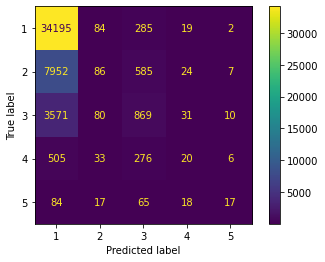

In [ ]:
# Import scikit-learn metrics module. See complete list of Classification metrics here: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
from sklearn import metrics

from matplotlib import pyplot as plt
cm = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels=['1', '2','3','4','5'])
cm_display.plot(values_format='d')
plt.show()

This model can get about 72% of predictions correct

In [ ]:
clf.score(X_test, y_test)

0.7204397944350034